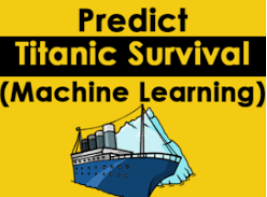

In [113]:
#importing required libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
# Loading CSV File
titanic_data = pd.read_csv('/content/train.csv')

In [115]:
# Top 5 rows 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
#Bottom 5 rows
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [117]:
#informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
# Checking Missing Values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
# drop the "Cabin" column 
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [120]:
# Column "Age" impute with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [121]:
#Column "Embarked" impute with mode values
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [122]:
print(titanic_data['Embarked'].mode()[0])

S


In [123]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [124]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [125]:
#Now there is no any missing vlaues are present 

In [126]:

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Data Visualization**

In [128]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


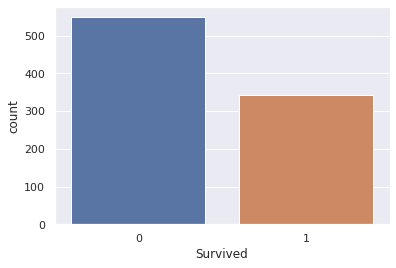

In [129]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=titanic_data)

In [130]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


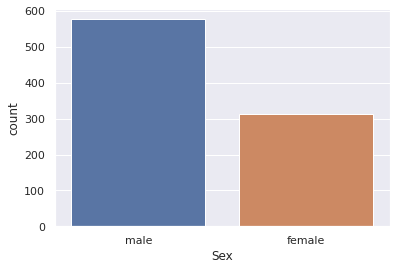

In [131]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


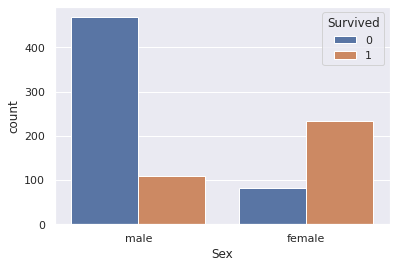

In [132]:
# number of survivors Gender wise
sns.countplot('Sex', hue='Survived', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


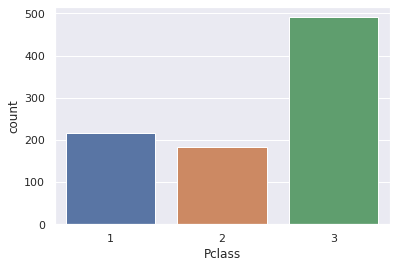

In [133]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


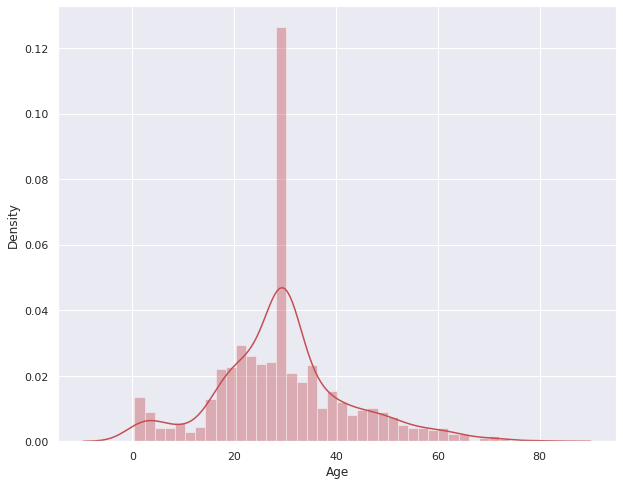

In [134]:
plt.figure(figsize=(10,8))
sns.distplot(titanic_data["Age"],color="r",bins=40)
plt.show()
#Max age from 20 to 40

Encoding the Categorical Columns

In [135]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [136]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [137]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [138]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [139]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Classify the Pclass Value into 1st Class,2nd Class and 3rd Class**

In [140]:
df1=titanic_data.replace({'Pclass': {1: "1st Class", 2: "2nd Class",3: "3rd Class"}})

In [141]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3rd Class,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3rd Class,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3rd Class,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [142]:
df2=pd.get_dummies(df1["Pclass"])

In [143]:
df2.head()

,1st Class,2nd Class,3rd Class
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


Separating features & Target

In [144]:
titanic_data=pd.concat([df1,df2],axis=1)

In [145]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1st Class,2nd Class,3rd Class
0,1,0,3rd Class,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3rd Class,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,0,0
4,5,0,3rd Class,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,0,1


In [153]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
1st Class        uint8
2nd Class        uint8
3rd Class        uint8
dtype: object

In [156]:
print(titanic_data["1st Class"].astype(int))
print(titanic_data["2nd Class"].astype(int))
print(titanic_data["3rd Class"].astype(int))

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: 1st Class, Length: 891, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: 2nd Class, Length: 891, dtype: int64
0      1
1      0
2      1
3      0
4      1
      ..
886    0
887    0
888    1
889    0
890    1
Name: 3rd Class, Length: 891, dtype: int64


In [157]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived','Pclass'],axis=1)
Y = titanic_data['Survived']

In [158]:
print(X)

     Sex        Age  SibSp  Parch  ...  Embarked  1st Class  2nd Class  3rd Class
0      0  22.000000      1      0  ...         0          0          0          1
1      1  38.000000      1      0  ...         1          1          0          0
2      1  26.000000      0      0  ...         0          0          0          1
3      1  35.000000      1      0  ...         0          1          0          0
4      0  35.000000      0      0  ...         0          0          0          1
..   ...        ...    ...    ...  ...       ...        ...        ...        ...
886    0  27.000000      0      0  ...         0          0          1          0
887    1  19.000000      0      0  ...         0          1          0          0
888    1  29.699118      1      2  ...         0          0          0          1
889    0  26.000000      0      0  ...         1          1          0          0
890    0  32.000000      0      0  ...         2          0          0          1

[891 rows x 9 c

In [159]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data & Test data

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [161]:
print(X.shape) 
print("Shape of X train",X_train.shape) 
print("Shape of X test",X_test.shape)

(891, 9)
Shape of X train (712, 9)
Shape of X test (179, 9)


**Model Training**

Logistic Regression

In [162]:
model = LogisticRegression()

In [163]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [164]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [165]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [166]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8146067415730337


In [167]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [168]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [169]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


In [170]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

